# Simple Convergence Tests
**by <span style="color:darkgreen">Pablo Garcia Risueno</span> & <span style="color:darkgreen">Pasquale Pavone</span>, for [<span style="color:DarkGoldenRod">exciting *oxygen*</span>](http://exciting.wikidot.com/oxygen)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, you will investigate how the choice of computational parameters can affect the result of an **exciting** calculation. The procedure which is used in this case is often called **convergence study** and allows to obtain the best value of such parameters. Explicit examples are presented for the convergence of the total energy of silver and diamond with respect to the choice for the **k**-points sampling (related to the parameter <code><span style="color:MediumBlue">ngridk</span></code>) and the dimension of the basis set (related to the parameter <code><span style="color:MediumBlue">rgkmax</span></code>).
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**

[0. Before Starting](#0)
    
[1. Convergence of Total-Energy Calculations](#1)
   - The mesh of k-points
   - The basis-set size
   - Scaling of the calculation time  
    
[2. Running Tests: Silver](#2)  
   - Using scripts for checking convergence
   - How to quantify convergence    

[3. Running Tests: Diamond](#3)
    
[4. Final Questions](#4)
</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from exciting's root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>



As a first step, you may set the **exciting_root** directory and create a running directory for the notebook.

In [1]:
import os
from excitingjupyter.utilities import get_exciting_root, check_for_binary

exciting_root = get_exciting_root()
check_for_binary(exciting_root)
exciting_species = os.path.join(exciting_root, "species")
print(exciting_root)

/home/mara/Pycharmprojects/exciting


In [ ]:
%%bash
mkdir run_tutorial2

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Convergence of Total-Energy Calculations</span>
A ground-state calculation using a **DFT** code like **exciting** fundamentally depends on 2 parameters

- the mesh of **k**-points (<code><span style="color:green">groundstate</span></code> attribute: <code><span style="color:mediumblue">ngridk</span></code>);
- the size of the basis set for expanding the wave function (<code><span style="color:green">groundstate</span></code> attribute: <code><span style="color:mediumblue">rgkmax</span></code>).

In order to be able to rely on your calculation, you need to understand what these two parameters mean and what is the effect of a change of their values **<span style="color:firebrick">on the physical quantities which are relevant for you</span>**. In this tutorial, we focus on the effect of such changes on the total energy of a crystal **<span style="color:firebrick">only for pedagogical reasons</span>**. In the general case, this kind of analysis **<span style="color:firebrick">must</span>** be made for all the properties of interest (*e.g.*, **lattice parameters**, **bulk modulus**, **equation of state**, **bandgap energies**, *etc.*).

For more informations on these parameters, please expand the links below.
<hr style="border:1px solid #DDD"> </hr>
<details>
    
<summary><strong><span style="color:firebrick">$\Rightarrow$ Read more on the mesh of k-points</span></strong></summary>
    
**<span style="color:#15317E">The mesh of k-points</span>**
    
From basic considerations of solid-state theory, it can be shown that the Schrödinger (or, in our case, Kohn-Sham) equation for a periodic system has a bunch of solutions, where each solution is characterized by a vector **k** in reciprocal space. This **k**-vector is essentially related to the periodicity of the corresponding solution of the Schrödinger equation: Roughly speaking, the solution will have the same value at coordinates in real space that, along the direction of **k**, have a distance of 2π/|**k**|.

Many properties of a solid, including the total energy, are represented as integrals, performed over all possible **k**-vectors. Obviously, the direct calculation of these integrals is very demanding (one should calculate the solution of the Schrödinger equation for a **huge** number of **k**-points). Therefore, the integrals are approximated by sums performed on a set of **k**-points distributed on a finite grid. The **spacing** of the points on the grid is a measure of the accuracy of the calculation of the integrals which also depends on how fast the integrand (the solution of the Schrödinger equation) varies by changing k. The challenge is to find a good number of **k**-points: Large enough to capture the physical properties of your system well, but small enough to keep calculations as fast as possible.

Some qualitative considerations:

- The larger the unit cell, the smaller is the required **k**-point mesh.
- Systems with longer-range interactions need larger k-point meshes.
    - In **<span style="color:firebrick">metals</span>** you need a large number of **k**-points, since the conduction electrons are delocalized over the whole system, i.e. the interactions are very long-ranged. Moreover, for a good description of the system it is important to know exactly where the conduction bands cross the Fermi level, which also requires a dense **k** mesh.
    - In contrast, **<span style="color:firebrick">semiconductors and insulators</span>** usually have much more localized electronic states, and a gap between valence and conduction bands. Thus, the number of **k**-points required for a good calculation is much smaller.
    
In **exciting** the parameter which is associated to the choiche of the mesh of **k**-points is <code><span style="color:mediumblue">ngridk</span></code>, see [**<span style="color:#3366BB">Input Reference</span>**](http://exciting.wikidot.com/ref:groundstate#attngridk) for further details.
</details>
<hr style="border:1px solid #DDD"> </hr>
<details>
 
<summary><strong><span style="color:firebrick">$\Rightarrow$ Read more on the basis-set size </span></strong></summary>
    
**<span style="color:#15317E">The basis-set size</span>**

Most of the **DFT** codes solve the Kohn-Sham equation in reciprocal space, expanding the wavefunctions in terms of suitable periodic basis functions. In our case, the basis functions are the **linearized augmented plane waves (LAPW)**. The larger the size of the basis set, the more accurate is the calculation. The corresponding <code><span style="color:green">groundstate</span></code> attribute in the exciting code is <code><span style="color:mediumblue">rgkmax</span></code> (see [**<span style="color:#3366BB">Input Reference</span>**](http://exciting.wikidot.com/ref:groundstate#attrgkmax)). The default value of <code><span style="color:mediumblue">rgkmax</span></code> is 7.0. In some cases, (*e.g.*, for a good description of forces), larger values (8.0 — 9.0) may be necessary to get reliable results. In some other cases, (*e.g.*, for describing very light materials like hydrogen), already smaller values of <code><span style="color:mediumblue">rgkmax</span></code> may be sufficient.
</details>
<hr style="border:1px solid #DDD"> </hr>
<details>
    
<summary><span style="color:firebrick"><strong>$\Rightarrow$ Read more on the scaling of the calculation time</strong></span></summary>
    
**<span style="color:#15317E">Scaling of the calculation time</span>**
    
The calculation time scales
- linearly with respect to the number of *k*-points;
- as <code><span style="color:mediumblue">rgkmax</span></code> to the power of **<span style="color:firebrick">9</span>**.
</details>

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>  

### <span style="color:#15317E">2. Running Tests: Silver</span>

In this first example, we investigate the dependence of the total energy on the parameters <code><span style="color:mediumblue">ngridk</span></code> and <code><span style="color:mediumblue">rgkmax</span></code> for the Ag crystal.
We start by creating an **exciting** (**xml**) input file called **input.xml** which should appear as the one below.

```xml
<input>

   <title>Ag: Convergence test</title>

   <structure speciespath="$EXCITINGROOT/species">

      <crystal scale="7.7201">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>

      <species speciesfile="Ag.xml">
         <atom coord="0.0  0.0  0.0" />
      </species>

   </structure>

   <groundstate
      xctype="GGA_PBE_SOL"
      ngridk="4 4 4"
      rgkmax="5.0">
   </groundstate>

</input>
```

The next step is writing the complete input as a string and saving it in your working directory as **input.xml**.

In [2]:
from excitingjupyter.utilities import re_input

# Convert markdown cell with input to string:
notebook = "tutorial2.ipynb"
xml_str = re_input(notebook, "Ag: Convergence test")
input_str = xml_str.replace("$EXCITINGROOT/species", f"{exciting_species}")

# Write out the input as an XML file:
with open(os.path.join(os.getcwd(), 'run_tutorial2/input.xml'), "w") as fid:
    fid.write(input_str)

In order to run **exciting** from the terminal, you simply need to execute the **exciting_smp** binary in the running directory. After a few seconds, the calculation should be finished.
Here we used the <code>time</code> command before **exciting_smp** in order to get, at the end of the run, the elapsed time explicitly written on the screen.

In [5]:
%%bash
cd run_tutorial2
# Set up environment. Note that this is platform-specific. With the Modules package you can e.g. use:
module load intel
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by bash)
bash: line 3: module: command not found


 ### Using specified input file: input.xml



real	0m14.233s
user	1m20.831s
sys	0m2.132s


After a few seconds, the calculation will be completed. Indeed, the calculation you have just performed uses very rough values for the parameters <code><span style="color:mediumblue">ngridk</span></code> and <code><span style="color:mediumblue">rgkmax</span></code>. The corresponding total energy (in Hartree) can be found as the last non empty line of the file **TOTENERGY.OUT**.

```
4  5.0  -5314.29682116   # ngridk rgkmax  total-energy
```

#### <span style="color:#15317E">Checking Convergence</span>

The convergence of your results can be checked inside the notebook. This can be done by varying the parameters <code><span style="color:mediumblue">ngridk</span></code> and <code><span style="color:mediumblue">rgkmax</span></code> in the input file, then running **exciting**, parsing the results and saving the value of the total energy for each case. Afterwards, you can plot the dependency of the energy on the parameters <code><span style="color:mediumblue">rgkmax</span></code> and <code><span style="color:mediumblue">ngridk</span></code>.

In the example below, we are considering the convergence of the total energy as a function of <code><span style="color:mediumblue">ngridk</span></code> at the constant value of <code><span style="color:mediumblue">rgkmax</span></code> = **"5"**.

In [3]:
from excitingtools import parser_chooser

total_energy_rgkmax_5 = []

k_initial, k_final, dk = (4, 21, 2)
for k in range(k_initial, k_final, dk):

    # Create input string:
    input_str_k = input_str.replace("4 4 4", f"{k} {k} {k}")

    # Write out input as an XML file:
    with open(os.path.join(os.getcwd(), 'run_tutorial2/input.xml'), "w") as fid:
        fid.write(input_str_k)

    # Move into the run directory and run exciting:
    ! cd run_tutorial2 && time $EXCITINGROOT/bin/exciting_smp input.xml

    # Parse results and append result for total energy:
    results = parser_chooser("./run_tutorial2/INFO.OUT")
    max_scf = max([int(i) for i in results['scl'].keys()])
    converged_results = results['scl'][str(max_scf)]
    total_energy_rgkmax_5.append(converged_results['Total energy'])

/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m10.010s
user	0m55.235s
sys	0m1.298s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m9.926s
user	0m57.923s
sys	0m1.630s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m14.322s
user	1m16.527s
sys	0m2.278s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m12.921s
user	1m10.713s
sys	0m1.924s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using sp

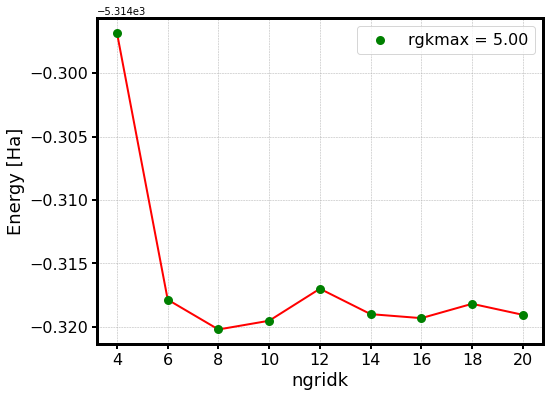

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.xlabel("ngridk", fontsize=18)
plt.ylabel("Energy [Ha]", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(length=5,width=2)
plt.rcParams["axes.linewidth"] = 3

k_grids = np.arange(k_initial, k_final, dk)
plt.plot(k_grids, total_energy_rgkmax_5, color="red", linewidth=2)
plt.scatter(k_grids, total_energy_rgkmax_5, color="green", label="rgkmax = 5.00", linewidth=3, zorder=2)

plt.legend(prop={"size":16})
plt.grid(linestyle = '--', linewidth = 0.5)

plt.show()

Then, you can use this procedure to plot the convergence for the following examples.
- **<span style="color:darkgreen">Example 1</span>**: Run on  <code><span style="color:mediumblue">ngridk</span></code> at fixed <code><span style="color:mediumblue">rgkmax</span></code> = "9"

In [7]:
input_str_rgkmax_9 = input_str.replace("5.0", "9.0")
total_energy_rgkmax_9 = []

for k in range(k_initial, k_final, dk):

    input_str_k = input_str_rgkmax_9.replace("4 4 4", f"{k} {k} {k}")
    with open(os.path.join(os.getcwd(), 'run_tutorial2/input.xml'), "w") as fid:
        fid.write(input_str_k)

    ! cd run_tutorial2 && time $EXCITINGROOT/bin/exciting_smp input.xml

    results = parser_chooser("./run_tutorial2/INFO.OUT")
    max_scf = max([int(i) for i in results['scl'].keys()])
    converged_results = results['scl'][str(max_scf)]
    total_energy_rgkmax_9.append(converged_results['Total energy'])

/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m17.217s
user	1m21.982s
sys	0m2.696s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m18.816s
user	1m36.323s
sys	0m2.992s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m20.962s
user	1m55.634s
sys	0m3.241s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m20.946s
user	2m16.742s
sys	0m3.841s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using s

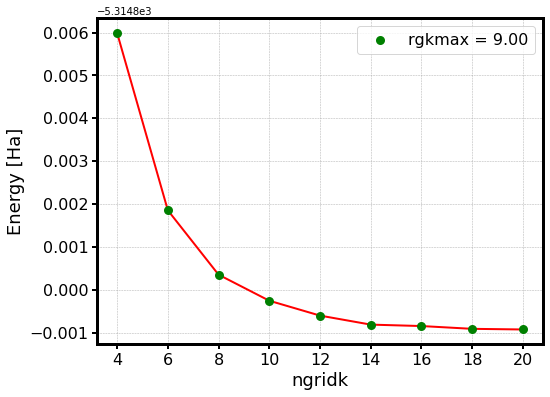

In [10]:
plt.figure(figsize=(8,6))
plt.xlabel("ngridk", fontsize=18)
plt.ylabel("Energy [Ha]", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(length=5,width=2)
plt.rcParams["axes.linewidth"] = 3

plt.plot(k_grids, total_energy_rgkmax_9, color="red", linewidth=2)
plt.scatter(k_grids, total_energy_rgkmax_9, color="green", label="rgkmax = 9.00", linewidth=3, zorder=2)

plt.legend(prop={"size":16})
plt.grid( linestyle = '--', linewidth = 0.5)

plt.show()

- **<span style="color:darkgreen">Example 2</span>**: Run on <code><span style="color:mediumblue">rgkmax</span></code> at fixed  <code><span style="color:mediumblue">ngridk</span></code> = "12 12 12"

In [11]:
input_str_ngridk_12 = input_str.replace("4 4 4", "12 12 12")
total_energy_ngridk_12 = []

rgkmax_initial, rgkmax_final = (5, 10)
for rgkmax in range(rgkmax_initial, rgkmax_final):

    input_str_rgkmax = input_str_ngridk_12.replace("5.0", f"{rgkmax}")
    with open(os.path.join(os.getcwd(), 'run_tutorial2/input.xml'), "w") as fid:
        fid.write(input_str_rgkmax)

    ! cd run_tutorial2 && time $EXCITINGROOT/bin/exciting_smp input.xml

    results = parser_chooser("./run_tutorial2/INFO.OUT")
    max_scf = max([int(i) for i in results['scl'].keys()])
    converged_results = results['scl'][str(max_scf)]
    total_energy_ngridk_12.append(converged_results['Total energy'])

/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m14.559s
user	1m25.746s
sys	0m2.484s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m13.434s
user	1m23.403s
sys	0m2.497s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m14.195s
user	1m31.350s
sys	0m2.560s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using specified input file: input.xml

real	0m18.157s
user	1m59.063s
sys	0m3.193s
/bin/bash: /home/intel/oneapi/intelpython/python3.9/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 ### Using s

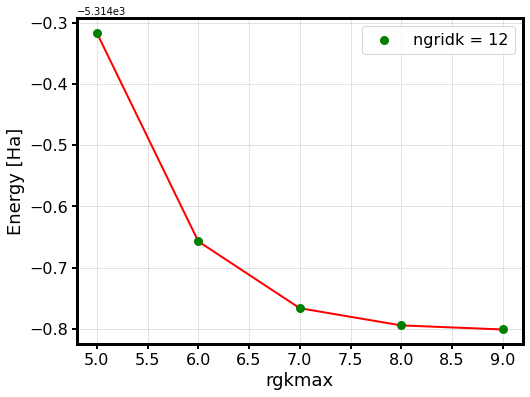

In [12]:
plt.figure(figsize=(8,6))
plt.xlabel("rgkmax", fontsize=18)
plt.ylabel("Energy [Ha]", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(length=5,width=2)
plt.rcParams["axes.linewidth"] = 3

rgkmax_range = np.arange(rgkmax_initial, rgkmax_final)
plt.plot(rgkmax_range, total_energy_ngridk_12, color="red", linewidth=2)
plt.scatter(rgkmax_range, total_energy_ngridk_12, color="green", label="ngridk = 12", linewidth=3, zorder=2)

plt.legend(prop={"size":16})
plt.grid( linestyle = '--', linewidth = 0.5)

plt.show()

- **<span style="color:darkgreen">Example 3</span>**: Two-dimentional run on both <code><span style="color:mediumblue">rgkmax</span></code> and  <code><span style="color:mediumblue">ngridk</span></code>

In [ ]:
total_energy_ngridk_rgkmax = np.empty([int((k_final - k_initial + 1) / dk), int(rgkmax_final - rgkmax_initial)])
for i_k, k in enumerate(range(k_initial, k_final, dk)):

    input_str_k = input_str.replace("4 4 4", f"{k} {k} {k}")

    for i_rgkmax, rgkmax in enumerate(range(rgkmax_initial, rgkmax_final)):

        input_str_k_rgkmax = input_str_k.replace("5.0", f"{rgkmax}")
        with open(os.path.join(os.getcwd(), 'run_tutorial2/input.xml'), "w") as fid:
            fid.write(input_str_k_rgkmax)

        ! cd run_tutorial2 && time $EXCITINGROOT/bin/exciting_smp input.xml

        results = parser_chooser("./run_tutorial2/INFO.OUT")
        max_scf = max([int(i) for i in results['scl'].keys()])
        converged_results = results['scl'][str(max_scf)]
        total_energy_ngridk_rgkmax[i_k, i_rgkmax] = converged_results['Total energy']

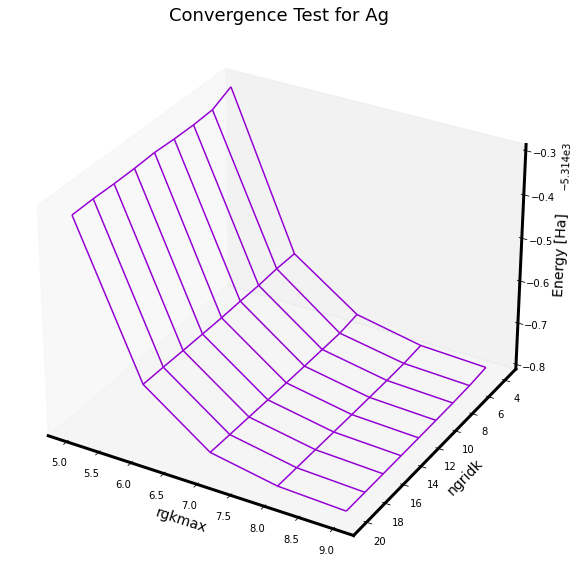

In [15]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(rgkmax_range, k_grids)
ax.plot_wireframe(X,Y, total_energy_ngridk_rgkmax, color='darkviolet')

ax.set_title('Convergence Test for Ag', fontsize=18)
ax.set_xlabel('rgkmax', fontsize=14)
ax.set_ylabel('ngridk', fontsize=14)
ax.set_zlabel("Energy [Ha]", fontsize=14)
ax.set_ylim(21, 3)
ax.grid(False)

plt.show()

#### How to quantify convergence

In this subsection we refer to the results of **<span style="color:darkgreen">Example 1</span>**. In this case the results of the calculation are the following:

In [6]:
rgkmax = 9
for i in range(len(total_energy_rgkmax_9)):
    print(f'{k_grids[i]:2} {rgkmax} {total_energy_rgkmax_9[i]}')

 4 9 -5314.79400824
 6 9 -5314.79814432
 8 9 -5314.79964595
10 9 -5314.80025313
12 9 -5314.8005999
14 9 -5314.80081015
16 9 -5314.80084355
18 9 -5314.80090859
20 9 -5314.80092347


Due to the fact that the difference between energies in contiguous rows becomes (increasingly) smaller going to large values of  <code><span style="color:mediumblue">ngridk</span></code>, this difference can be interpreted as a measure of the accuracy in the value of the calculated energy.

<hr style="border:1px solid #DDD"> </hr>
<a id='3'></a>

### <span style="color:#15317E">3. Running Tests: Diamond</span>

Repeat what you have done in the previous section for diamond. In contrast to silver, which is a metal, diamond an insulator. The corresponding input for **exciting** (**input.xml**) could look like the following.

```xml
<input>

   <title>Diamond: Convergence test</title>

   <structure speciespath="$EXCITINGROOT/species">

      <crystal scale="6.719">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>

      <species speciesfile="C.xml">
         <atom coord="0.00 0.00 0.00" />
         <atom coord="0.25 0.25 0.25" />
      </species>

   </structure>

   <groundstate
      xctype="GGA_PBE_SOL"
      ngridk="4 4 4"
      rgkmax="5.0"
      gmaxvr="14">
   </groundstate>

</input>
```

Finally, on the basis of what you learned above, try to reproduce the results for Diamond displayed in the following.

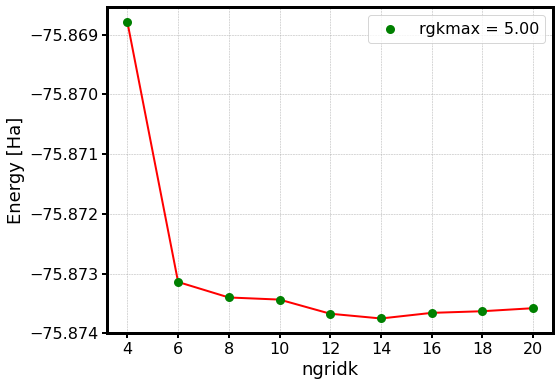

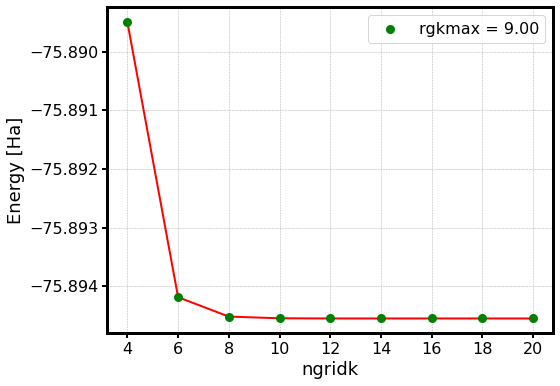

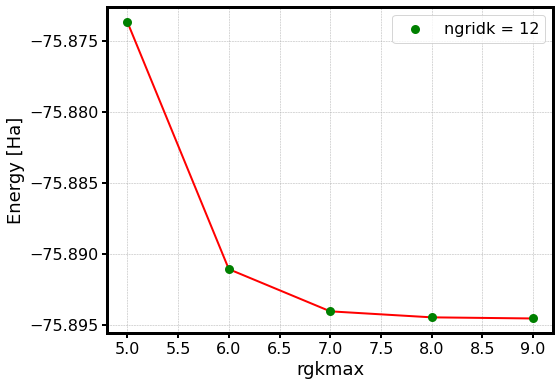

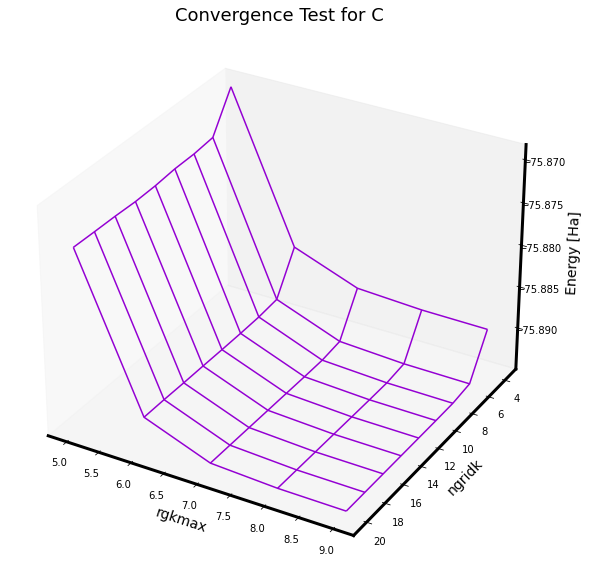

In [14]:
from reference_data_tutorial2 import *

# Plot for run on ngridk at fixed rgkmax = “5”:
plt.figure(figsize=(8,6))
plt.xlabel("ngridk", fontsize=18)
plt.ylabel("Energy [Ha]", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(length=5,width=2)
plt.rcParams["axes.linewidth"] = 3

k_grids = np.arange(k_initial, k_final, dk)
plt.plot(k_grids, ref_total_energy_rgkmax_5_Diamond, color="red", linewidth=2)
plt.scatter(k_grids, ref_total_energy_rgkmax_5_Diamond, color="green", label="rgkmax = 5.00", linewidth=3, zorder=2)

plt.legend(prop={"size":16})
plt.grid( linestyle = '--', linewidth = 0.5)

# Plot for run on ngridk at fixed rgkmax = “9”:
plt.figure(figsize=(8,6))
plt.xlabel("ngridk", fontsize=18)
plt.ylabel("Energy [Ha]", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(length=5,width=2)
plt.rcParams["axes.linewidth"] = 3

plt.plot(k_grids, ref_total_energy_rgkmax_9_Diamond, color="red", linewidth=2)
plt.scatter(k_grids, ref_total_energy_rgkmax_9_Diamond, color="green", label="rgkmax = 9.00", linewidth=3, zorder=2)

plt.legend(prop={"size":16})
plt.grid( linestyle = '--', linewidth = 0.5)

# PLot for run on rgkmax at fixed ngridk = “12 12 12”:
plt.figure(figsize=(8,6))
plt.xlabel("rgkmax", fontsize=18)
plt.ylabel("Energy [Ha]", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(length=5,width=2)
plt.rcParams["axes.linewidth"] = 3

rgkmax_range = np.arange(rgkmax_initial, rgkmax_final)
plt.plot(rgkmax_range, ref_total_energy_ngridk_12_Diamond, color="red", linewidth=2)
plt.scatter(rgkmax_range, ref_total_energy_ngridk_12_Diamond, color="green", label="ngridk = 12", linewidth=3, zorder=2)

plt.legend(prop={"size":16})
plt.grid( linestyle = '--', linewidth = 0.5)

# Plot for two-dimentional run on both rgkmax and ngridk:
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(rgkmax_range, k_grids)
ax.plot_wireframe(X,Y, ref_total_energy_ngridk_rgkmax_Diamond, color='darkviolet')

ax.set_title('Convergence Test for C', fontsize=18)
ax.set_xlabel('rgkmax', fontsize=14)
ax.set_ylabel('ngridk', fontsize=14)
ax.set_zlabel("Energy [Ha]", fontsize=14, labelpad=12)
ax.set_ylim(21, 3)
ax.grid(False)

plt.show()

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr> 

### <span style="color:#15317E">4. Final Questions</span>

- Is convergence with respect to the values of <code><span style="color:mediumblue">ngridk</span></code> faster for silver or diamond? Why?
- What about the convergence with respect to the values of <code><span style="color:mediumblue">rgkmax</span></code>?

<hr style="border:2px solid #DDD"> </hr>